In [1]:
%matplotlib ipympl
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# mods:
# 
# ontario
# starshadow
# monnkeymaster69

In [3]:
""" 

Will always exist 3 dataframes:
- df0: prices_round_2_day_-1.csv
- df1: prices_round_2_day_0.csv
- df2: prices_round_2_day_1.csv
  
"""

def initialise_data(round: int, day: int):
  df0 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day) + ".csv", delimiter=";", index_col=False)
  # df0 = df0.drop(columns=["timestamp"])
  chocolate0 = df0[df0["product"] == "CHOCOLATE"]
  chocolate0.reset_index(drop = True, inplace=True)
  strawberries0 = df0[df0["product"] == "STRAWBERRIES"]
  strawberries0.reset_index(drop = True, inplace=True)
  roses0 = df0[df0["product"] == "ROSES"]
  roses0.reset_index(drop = True, inplace=True)
  gift_basket0 = df0[df0["product"] == "GIFT_BASKET"]
  gift_basket0.reset_index(drop = True, inplace=True)
  
  df1 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day + 1) + ".csv", delimiter=";")
  # df1 = df1.drop(columns=["timestamp"])
  chocolate1 = df1[df1["product"] == "CHOCOLATE"]
  chocolate1.reset_index(drop = True, inplace=True)
  strawberries1 = df1[df1["product"] == "STRAWBERRIES"]
  strawberries1.reset_index(drop = True, inplace=True)
  roses1 = df1[df1["product"] == "ROSES"]
  roses1.reset_index(drop = True, inplace=True)
  gift_basket1 = df1[df1["product"] == "GIFT_BASKET"]
  gift_basket1.reset_index(drop = True, inplace=True)

  df2 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day + 2) + ".csv", delimiter=";")
  # df2 = df2.drop(columns=["timestamp"])
  chocolate2 = df2[df2["product"] == "CHOCOLATE"]
  chocolate2.reset_index(drop = True, inplace=True)
  strawberries2 = df2[df2["product"] == "STRAWBERRIES"]
  strawberries2.reset_index(drop = True, inplace=True)
  roses2 = df2[df2["product"] == "ROSES"]
  roses2.reset_index(drop = True, inplace=True)
  gift_basket2 = df2[df2["product"] == "GIFT_BASKET"]
  gift_basket2.reset_index(drop = True, inplace=True)

  return chocolate0, strawberries0, roses0, gift_basket0, chocolate1, strawberries1, roses1, gift_basket1, chocolate2, strawberries2, roses2, gift_basket2

chocolate0, strawberries0, roses0, gift_basket0, chocolate1, strawberries1, roses1, gift_basket1, chocolate2, strawberries2, roses2, gift_basket2 = initialise_data(3, 0)
chocolate0

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,100,CHOCOLATE,8001,52,8000.0,95.0,NaN,NaN,8002,147,NaN,NaN,NaN,NaN,8001.5,0.0
2,0,200,CHOCOLATE,8000,152,NaN,NaN,NaN,NaN,8002,152,NaN,NaN,NaN,NaN,8001.0,0.0
3,0,300,CHOCOLATE,8002,44,8001.0,84.0,NaN,NaN,8003,128,NaN,NaN,NaN,NaN,8002.5,0.0
4,0,400,CHOCOLATE,8001,118,NaN,NaN,NaN,NaN,8003,118,NaN,NaN,NaN,NaN,8002.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,CHOCOLATE,7987,60,7986.0,73.0,NaN,NaN,7988,133,NaN,NaN,NaN,NaN,7987.5,0.0
9996,0,999600,CHOCOLATE,7988,124,NaN,NaN,NaN,NaN,7989,51,7990.0,73.0,NaN,NaN,7988.5,0.0
9997,0,999700,CHOCOLATE,7987,138,NaN,NaN,NaN,NaN,7988,54,7989.0,84.0,NaN,NaN,7987.5,0.0
9998,0,999800,CHOCOLATE,7989,38,7988.0,81.0,NaN,NaN,7990,38,7991.0,81.0,NaN,NaN,7989.5,0.0


In [44]:
mid_chocolate0 = chocolate0[['bid_price_3', 'ask_price_3']].copy()
mid_chocolate0["bid_price_3"] = mid_chocolate0["bid_price_3"].fillna(chocolate0['bid_price_2'])
mid_chocolate0["bid_price_3"] = mid_chocolate0["bid_price_3"].fillna(chocolate0['bid_price_1'])
mid_chocolate0["ask_price_3"] = mid_chocolate0["ask_price_3"].fillna(chocolate0['ask_price_2'])
mid_chocolate0["ask_price_3"] = mid_chocolate0["ask_price_3"].fillna(chocolate0['ask_price_1'])
mid_chocolate0.insert(2, "mid", (mid_chocolate0["bid_price_3"] + mid_chocolate0["ask_price_3"])/2)
mid_chocolate1 = chocolate1[['bid_price_3', 'ask_price_3']].copy()
mid_chocolate1["bid_price_3"] = mid_chocolate1["bid_price_3"].fillna(chocolate1['bid_price_2'])
mid_chocolate1["bid_price_3"] = mid_chocolate1["bid_price_3"].fillna(chocolate1['bid_price_1'])
mid_chocolate1["ask_price_3"] = mid_chocolate1["ask_price_3"].fillna(chocolate1['ask_price_2'])
mid_chocolate1["ask_price_3"] = mid_chocolate1["ask_price_3"].fillna(chocolate1['ask_price_1'])
mid_chocolate1.insert(2, "mid", (mid_chocolate1["bid_price_3"] + mid_chocolate1["ask_price_3"])/2)
mid_chocolate2 = chocolate2[['bid_price_3', 'ask_price_3']].copy()
mid_chocolate2["bid_price_3"] = mid_chocolate2["bid_price_3"].fillna(chocolate2['bid_price_2'])
mid_chocolate2["bid_price_3"] = mid_chocolate2["bid_price_3"].fillna(chocolate2['bid_price_1'])
mid_chocolate2["ask_price_3"] = mid_chocolate2["ask_price_3"].fillna(chocolate2['ask_price_2'])
mid_chocolate2["ask_price_3"] = mid_chocolate2["ask_price_3"].fillna(chocolate2['ask_price_1'])
mid_chocolate2.insert(2, "mid", (mid_chocolate2["bid_price_3"] + mid_chocolate2["ask_price_3"])/2)

In [45]:
mid_roses0 = roses0[['bid_price_3', 'ask_price_3']].copy()
mid_roses0["bid_price_3"] = mid_roses0["bid_price_3"].fillna(roses0['bid_price_2'])
mid_roses0["bid_price_3"] = mid_roses0["bid_price_3"].fillna(roses0['bid_price_1'])
mid_roses0["ask_price_3"] = mid_roses0["ask_price_3"].fillna(roses0['ask_price_2'])
mid_roses0["ask_price_3"] = mid_roses0["ask_price_3"].fillna(roses0['ask_price_1'])
mid_roses0.insert(2, "mid", (mid_roses0["bid_price_3"] + mid_roses0["ask_price_3"])/2)
mid_roses1 = roses1[['bid_price_3', 'ask_price_3']].copy()
mid_roses1["bid_price_3"] = mid_roses1["bid_price_3"].fillna(roses1['bid_price_2'])
mid_roses1["bid_price_3"] = mid_roses1["bid_price_3"].fillna(roses1['bid_price_1'])
mid_roses1["ask_price_3"] = mid_roses1["ask_price_3"].fillna(roses1['ask_price_2'])
mid_roses1["ask_price_3"] = mid_roses1["ask_price_3"].fillna(roses1['ask_price_1'])
mid_roses1.insert(2, "mid", (mid_roses1["bid_price_3"] + mid_roses1["ask_price_3"])/2)
mid_roses2 = roses2[['bid_price_3', 'ask_price_3']].copy()
mid_roses2["bid_price_3"] = mid_roses2["bid_price_3"].fillna(roses2['bid_price_2'])
mid_roses2["bid_price_3"] = mid_roses2["bid_price_3"].fillna(roses2['bid_price_1']) 
mid_roses2["ask_price_3"] = mid_roses2["ask_price_3"].fillna(roses2['ask_price_2'])
mid_roses2["ask_price_3"] = mid_roses2["ask_price_3"].fillna(roses2['ask_price_1'])
mid_roses2.insert(2, "mid", (mid_roses2["bid_price_3"] + mid_roses2["ask_price_3"])/2)

In [46]:
mid_strawberries0 = strawberries0[['bid_price_3', 'ask_price_3']].copy()
mid_strawberries0["bid_price_3"] = mid_strawberries0["bid_price_3"].fillna(strawberries0['bid_price_2'])
mid_strawberries0["bid_price_3"] = mid_strawberries0["bid_price_3"].fillna(strawberries0['bid_price_1'])
mid_strawberries0["ask_price_3"] = mid_strawberries0["ask_price_3"].fillna(strawberries0['ask_price_2'])
mid_strawberries0["ask_price_3"] = mid_strawberries0["ask_price_3"].fillna(strawberries0['ask_price_1'])
mid_strawberries0.insert(2, "mid", (mid_strawberries0["bid_price_3"] + mid_strawberries0["ask_price_3"])/2)
mid_strawberries1 = strawberries1[['bid_price_3', 'ask_price_3']].copy()
mid_strawberries1["bid_price_3"] = mid_strawberries1["bid_price_3"].fillna(strawberries1['bid_price_2'])
mid_strawberries1["bid_price_3"] = mid_strawberries1["bid_price_3"].fillna(strawberries1['bid_price_1'])
mid_strawberries1["ask_price_3"] = mid_strawberries1["ask_price_3"].fillna(strawberries1['ask_price_2'])
mid_strawberries1["ask_price_3"] = mid_strawberries1["ask_price_3"].fillna(strawberries1['ask_price_1'])
mid_strawberries1.insert(2, "mid", (mid_strawberries1["bid_price_3"] + mid_strawberries1["ask_price_3"])/2)
mid_strawberries2 = strawberries2[['bid_price_3', 'ask_price_3']].copy()
mid_strawberries2["bid_price_3"] = mid_strawberries2["bid_price_3"].fillna(strawberries2['bid_price_2'])
mid_strawberries2["bid_price_3"] = mid_strawberries2["bid_price_3"].fillna(strawberries2['bid_price_1'])
mid_strawberries2["ask_price_3"] = mid_strawberries2["ask_price_3"].fillna(strawberries2['ask_price_2'])
mid_strawberries2["ask_price_3"] = mid_strawberries2["ask_price_3"].fillna(strawberries2['ask_price_1'])
mid_strawberries2.insert(2, "mid", (mid_strawberries2["bid_price_3"] + mid_strawberries2["ask_price_3"])/2)

In [47]:
mid_gift_basket0 = gift_basket0[['bid_price_3', 'ask_price_3']].copy()
mid_gift_basket0["bid_price_3"] = mid_gift_basket0["bid_price_3"].fillna(gift_basket0['bid_price_2'])
mid_gift_basket0["bid_price_3"] = mid_gift_basket0["bid_price_3"].fillna(gift_basket0['bid_price_1'])
mid_gift_basket0["ask_price_3"] = mid_gift_basket0["ask_price_3"].fillna(gift_basket0['ask_price_2'])
mid_gift_basket0["ask_price_3"] = mid_gift_basket0["ask_price_3"].fillna(gift_basket0['ask_price_1'])
mid_gift_basket0.insert(2, "mid", (mid_gift_basket0["bid_price_3"] + mid_gift_basket0["ask_price_3"])/2)
mid_gift_basket1 = gift_basket1[['bid_price_3', 'ask_price_3']].copy()
mid_gift_basket1["bid_price_3"] = mid_gift_basket1["bid_price_3"].fillna(gift_basket1['bid_price_2'])
mid_gift_basket1["bid_price_3"] = mid_gift_basket1["bid_price_3"].fillna(gift_basket1['bid_price_1'])
mid_gift_basket1["ask_price_3"] = mid_gift_basket1["ask_price_3"].fillna(gift_basket1['ask_price_2'])
mid_gift_basket1["ask_price_3"] = mid_gift_basket1["ask_price_3"].fillna(gift_basket1['ask_price_1'])
mid_gift_basket1.insert(2, "mid", (mid_gift_basket1["bid_price_3"] + mid_gift_basket1["ask_price_3"])/2)
mid_gift_basket2 = gift_basket2[['bid_price_3', 'ask_price_3']].copy()
mid_gift_basket2["bid_price_3"] = mid_gift_basket2["bid_price_3"].fillna(gift_basket2['bid_price_2'])
mid_gift_basket2["bid_price_3"] = mid_gift_basket2["bid_price_3"].fillna(gift_basket2['bid_price_1'])
mid_gift_basket2["ask_price_3"] = mid_gift_basket2["ask_price_3"].fillna(gift_basket2['ask_price_2'])
mid_gift_basket2["ask_price_3"] = mid_gift_basket2["ask_price_3"].fillna(gift_basket2['ask_price_1'])
mid_gift_basket2.insert(2, "mid", (mid_gift_basket2["bid_price_3"] + mid_gift_basket2["ask_price_3"])/2)

In [58]:
diy0 = roses0[["timestamp", "bid_price_1"]].copy()
diy1 = roses1[["timestamp", "bid_price_1"]].copy()
diy2 = roses2[["timestamp", "bid_price_1"]].copy()
diy0.reset_index(drop = True, inplace=True)
diy1.reset_index(drop = True, inplace=True)
diy2.reset_index(drop = True, inplace=True)
# diy["sum"] = (roses0["bid_price_1"]+roses0["ask_price_1"])/2 + 4*(chocolate0["bid_price_1"]+chocolate0["ask_price_1"])/2 + 6*(strawberries0["bid_price_1"]+strawberries0["ask_price_1"])/2 + 400 -26
# diy1["sum"] = (roses1["bid_price_1"]+roses1["ask_price_1"])/2 + 4*(chocolate1["bid_price_1"]+chocolate1["ask_price_1"])/2 + 6*(strawberries1["bid_price_1"]+strawberries1["ask_price_1"])/2 + 400 -26
# diy2["sum"] = (roses2["bid_price_1"]+roses2["ask_price_1"])/2 + 4*(chocolate2["bid_price_1"]+chocolate2["ask_price_1"])/2 + 6*(strawberries2["bid_price_1"]+strawberries2["ask_price_1"])/2 + 400 -26
diy0["sum"] = roses0["bid_price_1"] + 4*chocolate0["bid_price_1"] + 6*strawberries0["bid_price_1"] + 400
diy1["sum"] = roses1["bid_price_1"] + 4*chocolate1["bid_price_1"] + 6*strawberries1["bid_price_1"] + 400 
diy2["sum"] = roses2["bid_price_1"] + 4*chocolate2["bid_price_1"] + 6*strawberries2["bid_price_1"] + 400 
diy0["difference"] = diy0["sum"] - gift_basket0["bid_price_1"]
diy1["difference"] = diy1["sum"] - gift_basket1["bid_price_1"]
diy2["difference"] = diy2["sum"] - gift_basket2["bid_price_1"]

ndiy0 = roses0[["timestamp", "bid_price_1"]].copy()
ndiy1 = roses1[["timestamp", "bid_price_1"]].copy()
ndiy2 = roses2[["timestamp", "bid_price_1"]].copy()
ndiy0["sum"] = mid_roses0["mid"] + 4*mid_chocolate0["mid"] + 6*mid_strawberries0["mid"] + 400
ndiy1["sum"] = mid_roses1["mid"] + 4*mid_chocolate1["mid"] + 6*mid_strawberries1["mid"] + 400
ndiy2["sum"] = mid_roses2["mid"] + 4*mid_chocolate2["mid"] + 6*mid_strawberries2["mid"] + 400
ndiy0["difference"] = ndiy0["sum"] - mid_gift_basket0["mid"]
ndiy1["difference"] = ndiy1["sum"] - mid_gift_basket1["mid"]
ndiy2["difference"] = ndiy2["sum"] - mid_gift_basket2["mid"]

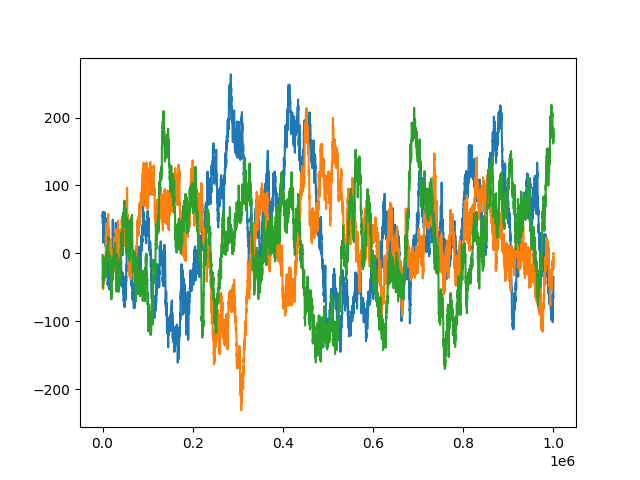

In [57]:
fig, axes = plt.subplots()
axes.plot(ndiy0["timestamp"], ndiy0["difference"], label="day 0")
axes.plot(ndiy0["timestamp"], ndiy1["difference"], label="day 1")
axes.plot(ndiy0["timestamp"], ndiy2["difference"], label="day 2")
plt.show()

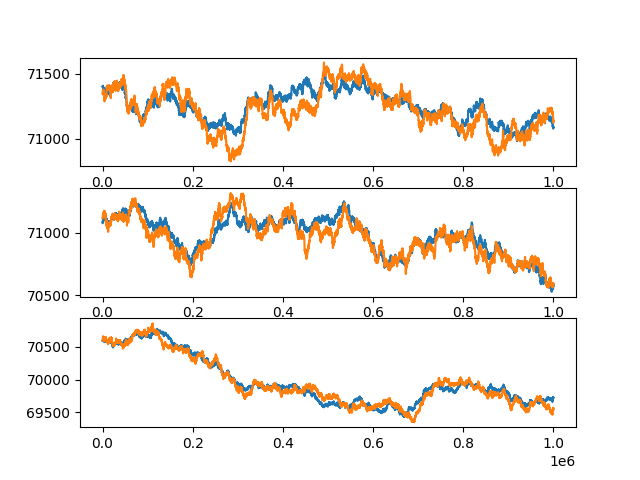

In [65]:
fig, axes = plt.subplots(3,1)
axes[0].plot(diy0["timestamp"], ndiy0["sum"], label="day 0")
axes[0].plot(diy0["timestamp"], mid_gift_basket0["mid"], label="day 1")
axes[1].plot(diy1["timestamp"], ndiy1["sum"], label="day 1")
axes[1].plot(diy1["timestamp"], mid_gift_basket1["mid"], label="day 2")
axes[2].plot(diy2["timestamp"], ndiy2["sum"], label="day 2")
axes[2].plot(diy2["timestamp"], mid_gift_basket2["mid"], label="day 3")

In [67]:
differences = pd.Series(ndiy0["difference"].to_list() + ndiy1["difference"].to_list() + ndiy2["difference"].to_list())
print("OVERALL MEAN: " + str(differences.mean()))
print("OVERALL STD: " + str(differences.std()))
diff1 = pd.Series(ndiy0["difference"].to_list())
print("MEAN1: " + str(diff1.mean()))
print("STD1: " + str(diff1.std()))
diff2 = pd.Series(ndiy1["difference"].to_list())
print("MEAN2: " + str(diff2.mean()))
print("STD2: " + str(diff2.std()))
diff3 = pd.Series(ndiy2["difference"].to_list())
print("MEAN3: " + str(diff3.mean()))
print("STD3: " + str(diff3.std()))

OVERALL MEAN: 20.525583333333334
OVERALL STD: 76.4202568412432
MEAN1: 29.74905
STD1: 85.31223486018393
MEAN2: 18.0884
STD2: 65.71738288216663
MEAN3: 13.7393
STD3: 76.07433020330569


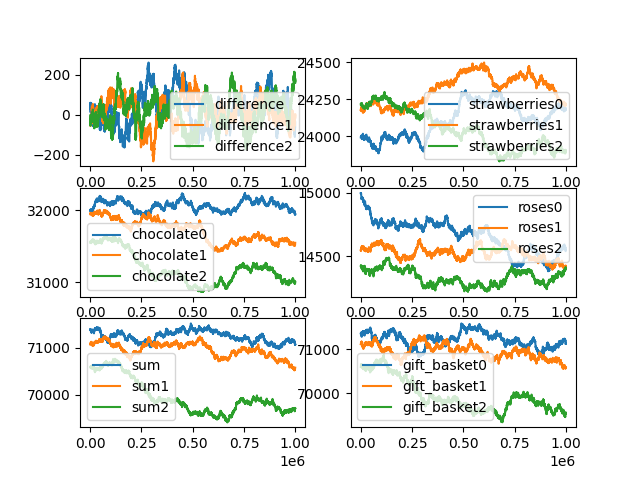

In [5]:
# plt.plot(chocolate0["timestamp"], chocolate0["bid_price_1"])
# plt.plot(diy_gift_basket["timestamp"], diy_gift_basket["sum"])
fig, axes = plt.subplots(3, 2)

axes[0, 0].plot(ndiy0["timestamp"], ndiy0["difference"])
axes[0, 0].plot(ndiy1["timestamp"], ndiy1["difference"])
axes[0, 0].plot(ndiy2["timestamp"], ndiy2["difference"])
axes[0, 0].legend(["difference", "difference1", "difference2"])

axes[1,0].plot(chocolate0["timestamp"], 4*chocolate0["bid_price_1"])
axes[1,0].plot(chocolate1["timestamp"], 4*chocolate1["bid_price_1"])
axes[1,0].plot(chocolate2["timestamp"], 4*chocolate2["bid_price_1"])
axes[1,0].legend(["chocolate0", "chocolate1", "chocolate2"])

axes[0,1].plot(strawberries0["timestamp"], 6*strawberries0["bid_price_1"])
axes[0,1].plot(strawberries1["timestamp"], 6*strawberries1["bid_price_1"])
axes[0,1].plot(strawberries2["timestamp"], 6*strawberries2["bid_price_1"])
axes[0,1].legend(["strawberries0", "strawberries1", "strawberries2"])

axes[1,1].plot(roses0["timestamp"], roses0["bid_price_1"])
axes[1,1].plot(roses1["timestamp"], roses1["bid_price_1"])
axes[1,1].plot(roses2["timestamp"], roses2["bid_price_1"])
axes[1,1].legend(["roses0", "roses1", "roses2"])

axes[2,0].plot(ndiy0["timestamp"], ndiy0["sum"])
axes[2,0].plot(ndiy1["timestamp"], ndiy1["sum"])
axes[2,0].plot(ndiy2["timestamp"], ndiy2["sum"])
axes[2,0].legend(["sum", "sum1", "sum2"])

axes[2,1].plot(gift_basket0["timestamp"], gift_basket0["bid_price_1"])
axes[2,1].plot(gift_basket1["timestamp"], gift_basket1["bid_price_1"])
axes[2,1].plot(gift_basket2["timestamp"], gift_basket2["bid_price_1"])
axes[2,1].legend(["gift_basket0", "gift_basket1", "gift_basket2"])

plt.show()

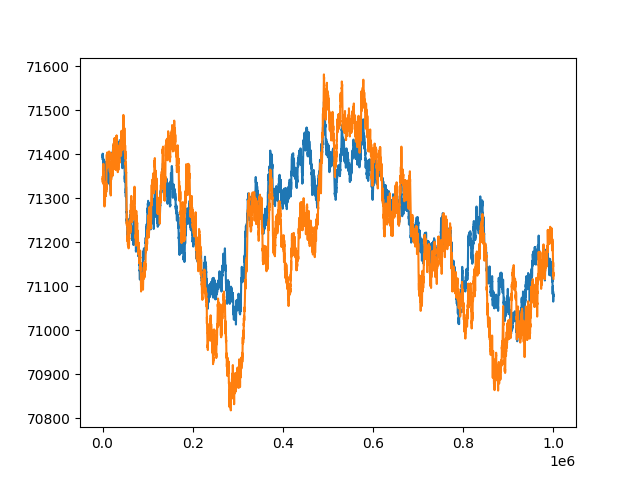

In [9]:
fig, axes = plt.subplots()
axes.plot(ndiy0["timestamp"], ndiy0["sum"])
axes.plot(gift_basket0["timestamp"], gift_basket0["bid_price_1"])
plt.show()

NameError: name 'df1' is not defined

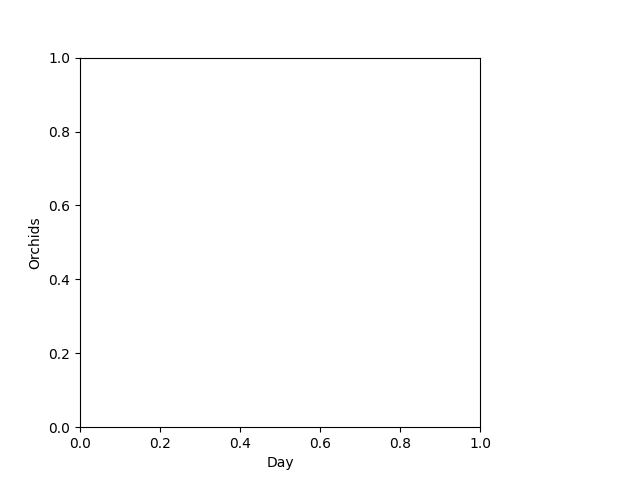

In [7]:
fig, price = plt.subplots()
fig.subplots_adjust(right=0.75)

price.set_xlabel('Day')
price.set_ylabel('Orchids')
price.plot(df1.index, df1["ORCHIDS"])
price.tick_params(axis='y')

sunlight = price.twinx()

sunlight.set_ylabel('Sunlight')
sunlight.plot(df1.index, df1["SUNLIGHT"])
sunlight.tick_params(axis='y')

humidity = price.twinx()
humidity.spines.right.set_position(("axes", 1.2))

color = 'midnightblue'
humidity.set_ylabel('Humidity')
humidity.plot(df1.index, df1["HUMIDITY"], color="darkslategray")
humidity.tick_params(axis='y')

fig.tight_layout()
plt.show(block=True)


In [ ]:
fig, price = plt.subplots()
fig.subplots_adjust(right=0.75)

price.set_xlabel('Day')
price.set_ylabel('Orchids')
price.plot(df2.index, df2["ORCHIDS"])
price.tick_params(axis='y')

sunlight = price.twinx()

sunlight.set_ylabel('Sunlight')
sunlight.plot(df2.index, df2["SUNLIGHT"])
sunlight.tick_params(axis='y')

humidity = price.twinx()
humidity.spines.right.set_position(("axes", 1.2))

color = 'midnightblue'
humidity.set_ylabel('Humidity')
humidity.plot(df2.index, df2["HUMIDITY"], color="darkgoldenrod")
humidity.tick_params(axis='y')

fig.tight_layout()
plt.show(block=True)

In [ ]:
df = pd.read_csv("only_useful_data.csv", delimiter=";")
df = df.drop(columns=["day", "timestamp"])

orchids = df[df["product"] == "ORCHIDS"]
orchids = orchids.drop(columns=["product"])
orchids

In [ ]:
fig, price = plt.subplots()
fig.subplots_adjust(right=0.75)

price.set_xlabel('timestamp')
price.set_ylabel('')
price.plot(df2.index, df2["ORCHIDS"])
price.tick_params(axis='y')

sunlight = price.twinx()

sunlight.set_ylabel('Sunlight')
sunlight.plot(df2.index, df2["SUNLIGHT"])
sunlight.tick_params(axis='y')

humidity = price.twinx()
humidity.spines.right.set_position(("axes", 1.2))

color = 'midnightblue'
humidity.set_ylabel('Humidity')
humidity.plot(df2.index, df2["HUMIDITY"], color="darkgoldenrod")
humidity.tick_params(axis='y')

fig.tight_layout()
plt.show(block=True)